In [20]:
# Veri analizi ve görselleştirme işlemleri için gerekli kütüphaneler içe aktarılmıştır.
# Pandas ve Numpy veri işleme, Matplotlib ve Seaborn ise grafik çizimi için kullanılacaktır.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
# Google Colab ortamına proje kapsamında kullanılacak CSV veri seti yüklenmektedir.
# Bu işlem kullanıcıdan dosya seçmesi istenerek gerçekleştirilir.

from google.colab import files
uploaded = files.upload()


Saving Sleep_health.csv to Sleep_health (1).csv


In [22]:
# Yüklenen CSV dosyası Pandas kütüphanesi kullanılarak okunmuştur.
# Veri setinin ilk 5 satırı görüntülenerek genel yapısı hakkında ön inceleme yapılmıştır.

df = pd.read_csv("Sleep_health.csv")
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
df.info()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [19]:
df.isnull().sum()
df["Sleep Disorder"] = df["Sleep Disorder"].fillna("None")

In [18]:
df["Sleep Duration"].mean() #Sorgu 1 – Ortalama uyku süresi

np.float64(7.132085561497325)

In [17]:
df.groupby("Gender")["Sleep Duration"].mean() #Sorgu 2 – Cinsiyete göre ortalama uyku


,Sleep Duration
Gender,
Female,7.229730
Male,7.036508


In [16]:
df.groupby("Occupation")["Quality of Sleep"].mean().sort_values(ascending=False) #Sorgu 3 - Mesleklere göre uyku kalitesi

,Quality of Sleep
Occupation,
Engineer,8.412698
Lawyer,7.893617
Accountant,7.891892
Nurse,7.369863
Manager,7.000000
Teacher,6.975000
Doctor,6.647887
Software Engineer,6.500000
Salesperson,6.000000


In [15]:
df[["Stress Level", "Sleep Duration"]].corr() #Sorgu 4 - Stres ve uyku ilişkisi


,Stress Level,Sleep Duration
Stress Level,1.000000,-0.811023
Sleep Duration,-0.811023,1.000000


In [14]:
df.groupby("Sleep Disorder")["Heart Rate"].mean() #Sorgu 5 - Uyku bozukluğu ve nabız

,Heart Rate
Sleep Disorder,
Insomnia,70.467532
None,69.018265
Sleep Apnea,73.089744


In [13]:
df.groupby("BMI Category")["Daily Steps"].mean() #Sorgu 6 – BMI ve günlük adım

,Daily Steps
BMI Category,
Normal,6887.179487
Normal Weight,6766.666667
Obese,3350.000000
Overweight,6965.540541


In [12]:
df[["Physical Activity Level", "Quality of Sleep"]].corr() #Sorgu 7 – Fiziksel aktivite uyku kalitesi ilişkisi

,Physical Activity Level,Quality of Sleep
Physical Activity Level,1.000000,0.192896
Quality of Sleep,0.192896,1.000000


In [45]:
#Sorgu 8 – Yaşa göre ortalama uyku süresi
df.groupby("Age")["Sleep Duration"].mean()


,Sleep Duration
Age,
27,6.100000
28,6.020000
29,6.669231
30,7.569231
31,7.444444
32,6.588235
33,6.061538
34,5.800000
35,7.216667


In [44]:
#Sorgu 9 – Cinsiyete göre stres seviyesi
df.groupby("Gender")["Stress Level"].mean()


,Stress Level
Gender,
Female,4.675676
Male,6.079365


In [42]:
#Sorgu 10 – Uyku bozukluğu olanların ortalama uyku süresi
df.groupby("Sleep Disorder")["Sleep Duration"].mean()


,Sleep Duration
Sleep Disorder,
Insomnia,6.589610
Sleep Apnea,7.032051


In [43]:
#Sorgu 11 – Mesleklere göre stres seviyesi
df.groupby("Occupation")["Stress Level"].mean().sort_values(ascending=False)


,Stress Level
Occupation,
Sales Representative,8.000000
Salesperson,7.000000
Scientist,7.000000
Doctor,6.732394
Software Engineer,6.000000
Nurse,5.547945
Lawyer,5.063830
Manager,5.000000
Accountant,4.594595


In [41]:
#Sorgu 12 – Günlük adım ile uyku süresi korelasyonu
df[["Daily Steps", "Sleep Duration"]].corr()


,Daily Steps,Sleep Duration
Daily Steps,1.000000,-0.039533
Sleep Duration,-0.039533,1.000000


In [39]:
#Sorgu 13 – Günlük adım ile stres seviyesi korelasyonu
df[["Daily Steps", "Stress Level"]].corr()


,Daily Steps,Stress Level
Daily Steps,1.000000,0.186829
Stress Level,0.186829,1.000000


In [40]:
#Sorgu 14 – Fiziksel aktivite ve stres ilişkisi
df[["Physical Activity Level", "Stress Level"]].corr()


,Physical Activity Level,Stress Level
Physical Activity Level,1.000000,-0.034134
Stress Level,-0.034134,1.000000


In [38]:
#Sorgu 15 – BMI kategorisine göre uyku süresi
df.groupby("BMI Category")["Sleep Duration"].mean()


,Sleep Duration
BMI Category,
Normal,7.393846
Normal Weight,7.333333
Obese,6.960000
Overweight,6.770270


In [37]:
#Sorgu 16 – Cinsiyete göre ortalama nabız
df.groupby("Gender")["Heart Rate"].mean()


,Heart Rate
Gender,
Female,69.259459
Male,71.052910


In [36]:
#Sorgu 17 – Mesleklere göre günlük adım sayısı
df.groupby("Occupation")["Daily Steps"].mean().sort_values(ascending=False)


,Daily Steps
Occupation,
Nurse,8057.534247
Lawyer,7661.702128
Accountant,6881.081081
Doctor,6808.450704
Salesperson,6000.000000
Engineer,5980.952381
Teacher,5957.500000
Software Engineer,5800.000000
Manager,5500.000000


In [35]:
#Sorgu 18 – Uyku kalitesi ile uyku süresi ilişkisi
df[["Quality of Sleep", "Sleep Duration"]].corr()


,Quality of Sleep,Sleep Duration
Quality of Sleep,1.000000,0.883213
Sleep Duration,0.883213,1.000000


In [34]:
#Sorgu 19 – Uyku bozukluğu türüne göre stres seviyesi
df.groupby("Sleep Disorder")["Stress Level"].mean()


,Stress Level
Sleep Disorder,
Insomnia,5.870130
Sleep Apnea,5.666667


In [33]:
#Sorgu 20 – Fiziksel aktiviteye göre uyku süresi
df.groupby("Physical Activity Level")["Sleep Duration"].mean()


,Sleep Duration
Physical Activity Level,
30,7.185294
32,5.800000
35,6.500000
40,6.533333
42,6.100000
45,6.532353
47,6.900000
50,6.625000
55,7.100000


In [32]:
#Sorgu 21 – Yaşa göre stres seviyesi
df.groupby("Age")["Stress Level"].mean()


,Stress Level
Age,
27,6.000000
28,8.000000
29,7.153846
30,6.153846
31,6.222222
32,6.941176
33,7.692308
34,8.000000
35,4.416667


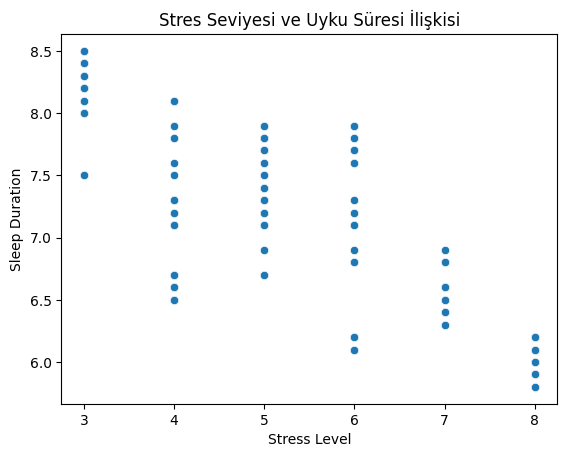

In [31]:
#Grafik 1 – Stres & Uyku Süresi
plt.figure()
sns.scatterplot(x="Stress Level", y="Sleep Duration", data=df)
plt.title("Stres Seviyesi ve Uyku Süresi İlişkisi")
plt.show()


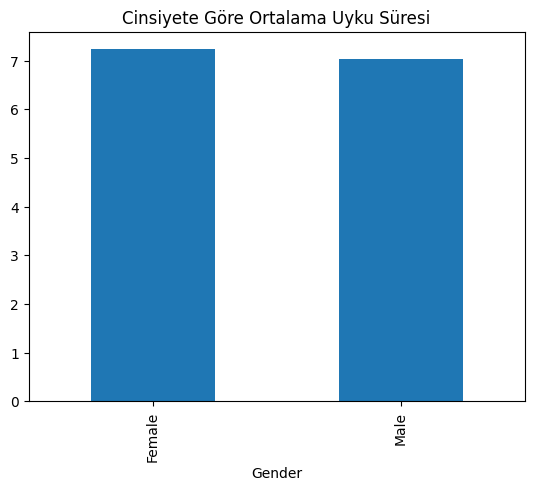

In [30]:
#Grafik 2 – Cinsiyete göre uyku süresi
plt.figure()
df.groupby("Gender")["Sleep Duration"].mean().plot(kind="bar")
plt.title("Cinsiyete Göre Ortalama Uyku Süresi")
plt.show()


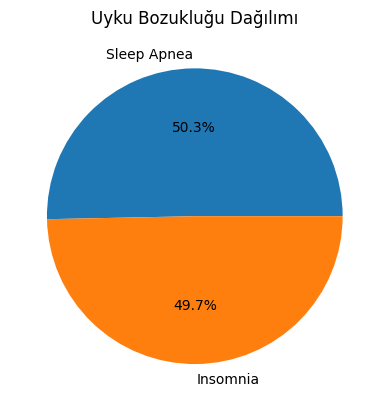

In [29]:
#Grafik 3 – Uyku bozukluğu dağılımı
plt.figure()
df["Sleep Disorder"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Uyku Bozukluğu Dağılımı")
plt.ylabel("")
plt.show()


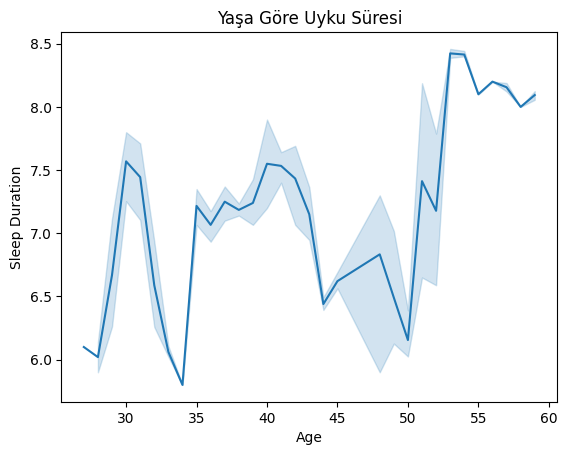

In [28]:
#Grafik 4 – Yaş ve Uyku Süresi
plt.figure()
sns.lineplot(x="Age", y="Sleep Duration", data=df)
plt.title("Yaşa Göre Uyku Süresi")
plt.show()

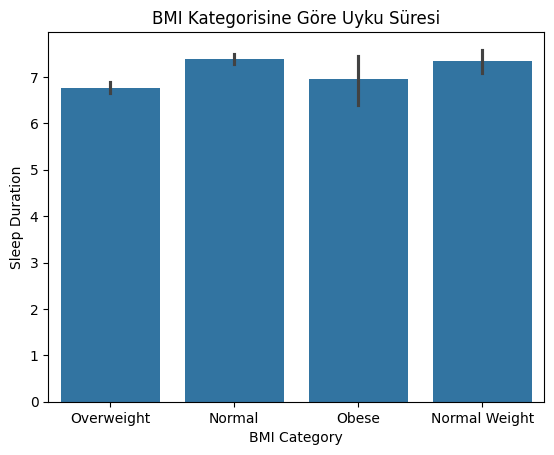

In [27]:
#Grafik 5 – BMI ve Uyku Süresi
plt.figure()
sns.barplot(x="BMI Category", y="Sleep Duration", data=df)
plt.title("BMI Kategorisine Göre Uyku Süresi")
plt.show()


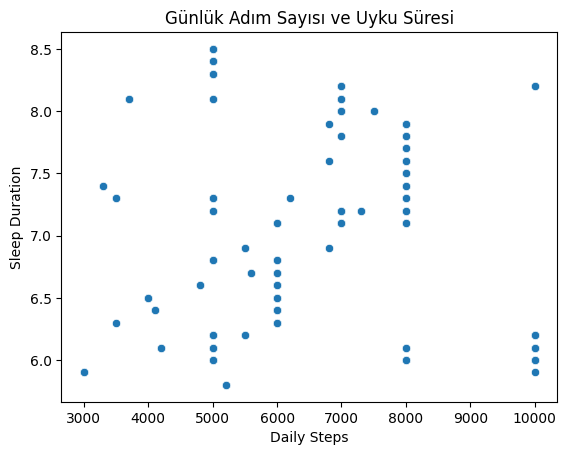

In [26]:
#Grafik 6 – Günlük Adım ve Uyku Süresi
plt.figure()
sns.scatterplot(x="Daily Steps", y="Sleep Duration", data=df)
plt.title("Günlük Adım Sayısı ve Uyku Süresi")
plt.show()


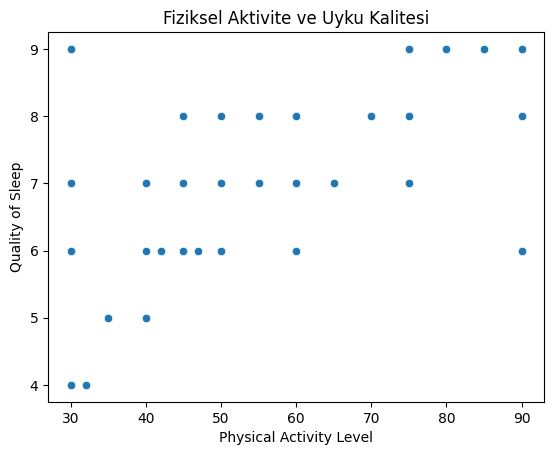

In [25]:
#Grafik 7 – Fiziksel Aktivite ve Uyku Kalitesi
plt.figure()
sns.scatterplot(x="Physical Activity Level", y="Quality of Sleep", data=df)
plt.title("Fiziksel Aktivite ve Uyku Kalitesi")
plt.show()


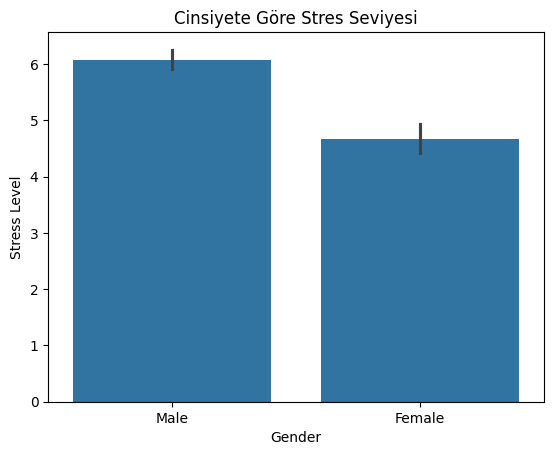

In [24]:
#Grafik 8 – Cinsiyete Göre Stres Seviyesi
plt.figure()
sns.barplot(x="Gender", y="Stress Level", data=df)
plt.title("Cinsiyete Göre Stres Seviyesi")
plt.show()


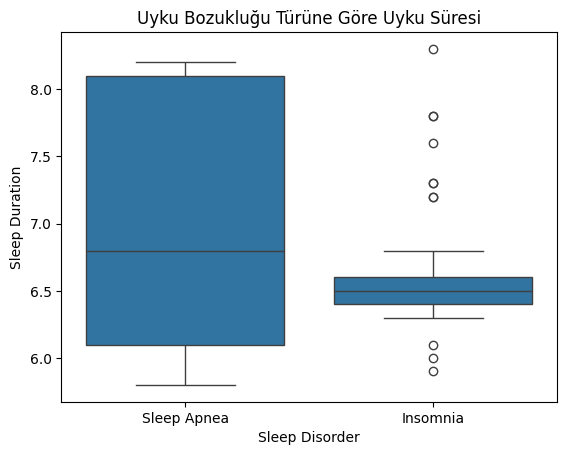

In [23]:
#Grafik 9 – Uyku Bozukluğu ve Uyku Süresi
plt.figure()
sns.boxplot(x="Sleep Disorder", y="Sleep Duration", data=df)
plt.title("Uyku Bozukluğu Türüne Göre Uyku Süresi")
plt.show()
